In [1]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

import numpy as np
import requests
import gmaps
import os
import time
from scipy.stats import linregress
import json

from api_keys import g_key

#11/2012 - 9/

In [4]:
#import all dataframe/csv from previous sheet
state_median_listing_price_df = pd.read_csv("state_median_listing_price.csv")
state_median_price_reduction_pct_df = pd.read_csv("state_median_price_reduction_pct.csv")
#second_elect = pd.read_csv("second_elect.csv")
#reduc_change_df = pd.read_csv("reduc_change.csv")
state_decrease_value_pct_df = pd.read_csv("state_decrease_value_pct.csv")
state_zhvi_summary_df = pd.read_csv("state_zhvi_summary.csv")
state_inventory_measure_ssa_df = pd.read_csv("state_inventory_measure_ssa.csv")

AttributeError: 'list' object has no attribute 'get_label'

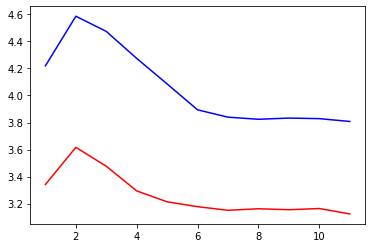

In [5]:
# Make a lingraph

st_med_reduc_line = state_median_price_reduction_pct_df.mean(axis=0)

first_elect = st_med_reduc_line.loc[['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']]
first_elect = first_elect.reset_index(drop=True)
first_elect = first_elect.values.tolist()

second_elect = st_med_reduc_line.loc[['2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09']]
second_elect = second_elect.reset_index(drop=True)
second_elect = second_elect.values.tolist()

periods = [1,2,3,4,5,6,7,8,9,10,11]
first_elect_line = plt.plot(periods, first_elect, color="blue", label="2012 Election")
second_elect_line = plt.plot(periods, second_elect, color="red", label="2016 Election")
plt.legend(handles=[first_elect_line, second_elect_line], loc="best")
plt.show()

#Make it look nicer, format it

In [6]:
price_reduc_change = state_median_price_reduction_pct_df
# The times 100 is so that the changes are more visible in the mapping
price_reduc_change['2012 Change'] = ((price_reduc_change['2012-11'] - price_reduc_change['2013-09']) * 100)
price_reduc_change['2016 Change'] = ((price_reduc_change['2016-11'] - price_reduc_change['2017-09']) * 100)
#list(price_reduc_change.columns)
#price_reduc_change

states_lat_lng = pd.read_csv("states.csv")
states_lat_lng = states_lat_lng.rename(columns={'name': 'RegionName'})
states_lat_lng = states_lat_lng.set_index('RegionName')

reduc_change = states_lat_lng.join(price_reduc_change, how='outer')
reduc_change_df = reduc_change.drop('Puerto Rico')
#reduc_change.head(51)


gmaps.configure(api_key=g_key)
locations = reduc_change_df[["latitude", "longitude"]].astype(float)
locations = locations.reset_index(drop=True)
percent_change = reduc_change_df['2012 Change'].astype(float)
# Can't map negative values for heat map, so made them into absolute values
percent_change = abs(percent_change)
percent_change = percent_change.reset_index(drop=True)

#how do Imake this work, I'm guessing its beacause the values are so small
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=percent_change, dissipating=False, max_intensity=75, point_radius = 2)
fig.add_layer(heat_layer)
fig
print('done')

InvalidPointException: nan is not a valid latitude. Latitudes must lie between -90 and 90.

In [12]:
#2012 election changes
price_reduc_change['2012 Change']
change_2012 = pd.DataFrame(price_reduc_change['2012 Change'])
change_2012
#blue_2012 = change_2012[[change_2012['RegionName'] == 'California' | 'New York' | 'Pennsylvania' | 'Massachusetts' |
 #                                  'Maryland' | 'Colorado' | 'Oregon' | 'Connecticut' | 'Vermont' | 'New Jersey' |
  #                                 'Delaware' | 'Florida' | 'Hawaii' | 'Illinois' | 'Iowa' | 'Rhode Island' | 'Pennsylvania'
  #                                 | 'Virginia' | 'Michigan' | 'Wisconsin' | 'Minnesota' | 'New Mexico' | 'Nevada' |
  #                                 'Washington']]
#blue_2012
#blue_2012.plot()
#red_2012 = change_2012.loc[change_2012['RegionName'] == 'Montana' | 'North Dakota' | 'South Dakota' | 'Nebraska' | 'Wyoming' 
#                           | 'Idaho' | 'Utah' | 'Arizona' | 'Alaska' | 'Texas' | 'Kansas' | 'Oklahoma' | 'Missouri' | 'Arkansas'
#                           | 'Louisiana' | 'Mississipi' | 'Alabama' | 'Tennessee' | 'Kentucky' | 'Indiana' | 'West Virginia' 
#                           | 'North Carolina' | 'South Carolina' | 'Georgia']
#red_2012


,2012 Change
0,69.433215
1,44.943315
2,12.119713
3,41.429514
4,64.194675
5,5.807068
6,22.613177
7,112.961715
8,75.280311
9,53.377815


In [15]:
#2016 election relults
price_reduc_change['2016 Change','RegionName']
change_2016 = pd.DataFrame(price_reduc_change['2016 Change'])
change_2016
#blue_2016 = change_2016.loc[change_2016['RegionName'] == 'California' | 'New York' | 'Pennsylvania' | 'Massachusetts' |
 #                                  'Maryland' | 'Colorado' | 'Oregon' | 'Connecticut' | 'Vermont' | 'New Jersey' |
  #                                 'Delaware' | 'Florida' | 'Hawaii' | 'Illinois' | 'Rhode Island' | 'Pennsylvania'
  #                                 | 'Virginia' | 'Minnesota' | 'New Mexico' | 'Nevada' |
  #                                 'Washington']
#blue_2016
#blue_2016.plot()
#red_2016 = change_2016.loc[change_2016['RegionName'] == 'Montana' | 'North Dakota' | 'South Dakota' | 'Nebraska' | 'Wyoming' 
#                           | 'Idaho' | 'Utah' | 'Arizona' | 'Alaska' | 'Texas' | 'Kansas' | 'Oklahoma' | 'Missouri' | 'Arkansas'
#                           | 'Louisiana' | 'Mississipi' | 'Alabama' | 'Tennessee' | 'Kentucky' | 'Indiana' | 'West Virginia' 
#                           | 'North Carolina' | 'South Carolina' | 'Georgia' | 'Iowa' | 'Wisconsin' | 'Michigan'| 'Ohio' |
#                           'Pennsylvania']
#red_2016

KeyError: ('2016 Change', 'RegionName')

In [9]:
reduc_change_df 
#reduc_change.head(51)

gmaps.configure(api_key=g_key)
places = reduc_change_df[["latitude", "longitude"]].astype(float)
places = places.reset_index(drop=True)
sixteen_percent_change = reduc_change_df['2016 Change'].astype(float)
# Can't map negative values for heat map, so made them into absolute values
sixteen_percent_change = abs(sixteen_percent_change)
sixteen_percent_change = sixteen_percent_change.reset_index(drop=True)
places
#how do Imake this work, I'm guessing its beacause the values are so small
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(places, weights=sixteen_percent_change, dissipating=False, max_intensity=100, point_radius = 2)
fig.add_layer(heat_layer)
fig


InvalidPointException: nan is not a valid latitude. Latitudes must lie between -90 and 90.

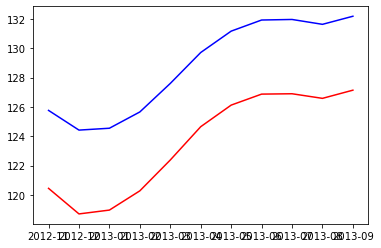

In [10]:
st_med_list = state_median_listing_price_df.mean(axis=0)
st_med_list = pd.DataFrame(st_med_list)
#st_med_list['Factor'] = (100 - st_med_list[''])
#twelve_rate = st_med_list.loc["2012 Change"]
#twelve_rate

reduc_change_mod = reduc_change_df[['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']]
avg_price_reduc_per_state = reduc_change_mod.mean()
avg_price_reduc_per_state = pd.DataFrame(avg_price_reduc_per_state)
avg_price_reduc_per_state = avg_price_reduc_per_state.rename(columns={0 :'Avg Price % Reduc'})
# Rename the column so we can mnaiuplate it better
avg_price_reduc_per_state['Factor'] = ((100 - avg_price_reduc_per_state['Avg Price % Reduc']) / 100)
factor_list = avg_price_reduc_per_state['Factor']
factor_list = pd.DataFrame(factor_list)
factor_list = factor_list.rename(columns={0 :'Avg Price % Reduc'})
factor_list = factor_list.reset_index(drop=True)
#factor_list
#st_med_list_price_line = pd.DataFrame(st_med_list_price_line)
#st_med_list

before_elect = st_med_list.loc[['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']]
before_elect = before_elect.reset_index(drop=True)
before_elect = before_elect.rename(columns={0 :'Avg List Price'})
before_elect
price_bf_af = factor_list.join(before_elect, how='outer')
before_elect = before_elect.values.tolist()
after_elect = (price_bf_af['Factor'] * price_bf_af['Avg List Price'])
after_elect = after_elect.values.tolist()
#before_elect

periods = ['2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09']

periods

before_elect_line = plt.plot(periods, before_elect, color="blue", label="2012 Listing Prices")
after_elect_line = plt.plot(periods, after_elect, color="red", label="2012 Listing Prices After Reduction")
#plt.legend(handles=["2012 Listing Prices","2012 Listing Prices After Reduction"], loc="best")
plt.show()